## EXERCISE: digits clustering:

- Perform K-means clustering on the digits data, searching for ten clusters. Visualize the cluster centers as images (i.e. reshape each to 8x8 and use ``plt.imshow``) Do the clusters seem to be correlated with particular digits?

- Visualize the projected digits as in we did in PCA example, but this time use the cluster labels as the color. What do you notice?


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

#loading data and spilit them
from sklearn.datasets import load_digits
digits = load_digits()
x, y = digits.data, digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [33]:
# preprocessing, Transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_project = pca.fit_transform(x_train)

In [35]:
print(x_train_scaled.shape)
print(x_project.shape)

(1257, 64)
(1257, 2)


In [40]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=10, random_state=42)
labels = kmean.fit_predict(x_project)
print(labels)

[0 2 1 ... 1 3 3]


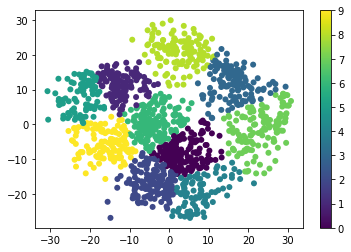

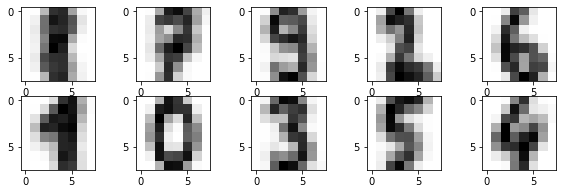

In [55]:
plt.scatter(x_project[:,0], x_project[:,1], c= labels, edgecolors='none')
plt.colorbar();

fig = plt.figure(figsize=(10, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)),
              cmap=plt.cm.binary)

(10, 64)


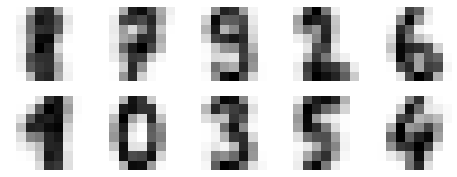

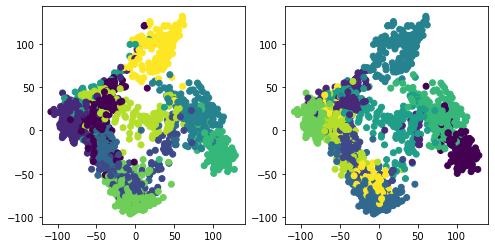

In [46]:
#Solution-class:

from sklearn.datasets import load_digits
digits = load_digits()

# %load solutions/08B_digits_clustering.py
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)

print(kmeans.cluster_centers_.shape)

#------------------------------------------------------------
# visualize the cluster centers
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)),
              cmap=plt.cm.binary)
    ax.grid(False)
    ax.axis('off')
    
#------------------------------------------------------------
# visualize the projected data
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=10).fit_transform(digits.data)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=digits.target);